In [1]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import polyflexmd.data_analysis.plot.msd as msd_plot
import polyflexmd.data_analysis.theory.rouse as rouse
import polyflexmd.data_analysis.transform.msdlm as transform_msdlm

import pathlib

%load_ext autoreload
%autoreload 2

sns.set_style("darkgrid")

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick label
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick label
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
def read_msd_lm_df(path):
    df_msd_lm = pd.read_csv(path)
    df_msd_lm["t/LJ"] = df_msd_lm["t"] * 0.0025
    df_msd_lm["t/LJ"] = df_msd_lm["t/LJ"] - df_msd_lm["t/LJ"].min()
    return df_msd_lm.loc[df_msd_lm["t/LJ"] > 1.0]

In [21]:
def get_ete_mean(path):
    df_ete = pd.read_csv(path)

    def calc_mean_R(df):
        R = 0
        for dim in ["x", "y", "z"]:
            R += (df[f"R_{dim}"] ** 2).mean()
        return R

    return df_ete.groupby("t").apply(calc_mean_R).rename("R^2")


N = 63
zeta = 1
b = .97
L_contour = N * b

experiments = [
    {
        "n": 17,
        "path": pathlib.Path(
            "/beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/17-EEA1_short-free_chain/ef6e4e76"),
        "zeta_e": 1.0,
        "l_K": 6.02,
        "label": "EEA1-chain, $l_K/L=6.02$ "
    },
    {
        "n": 18,
        "path": pathlib.Path(
            "/beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K-vary-d_end/18-EEA1_short+Rab5_10x-free_chain/ef6e4e76"),
        "zeta_e": 10.0,
        "l_K": 6.02,
        "label": "EEA1+Rab5-chain, $l_K/L=6.02$, $\\zeta_e=10.0$"
    },
    {
        "n": 19,
        "path": pathlib.Path(
            "/beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/19-EEA1_short-lp_bonded_like-free_chain/ef6e4e76"),
        "zeta_e": 1.0,
        "l_K": 0.6,
        "label": "EEA1-chain, $l_K/L=0.6$ (bonded-like)"
    },
    {
        "n": 20,
        "path": pathlib.Path(
            "/beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-full_flex/20-full_flex-free_chain/ef6e4e76"),
        "zeta_e": 1.0,
        "l_K": 1 / N,
        "label": "Fully flexible chain"
    },
]

for experiment in experiments:
    print(f"Reading {experiment['path']}...")
    if experiment["n"] == 17:
        experiment["df_msdlm"] = read_msd_lm_df(experiment["path"] / "data" / "processed" / "lm_msd_avg.csv")
    elif  experiment["n"] == 19:
        experiment["df_msdlm"] = read_msd_lm_df(experiment["path"] / "data" / "processed" / "lm_msd_avg_100.csv")
    elif  experiment["n"] == 20:
        experiment["df_msdlm"] = read_msd_lm_df(experiment["path"] / "data" / "processed" / "lm_msd_avg_500.csv")
    else:
        experiment["df_msdlm"] = read_msd_lm_df(experiment["path"] / "data" / "processed" / "lm_msd.csv")
    experiment["df_ete_mean"] = get_ete_mean(experiment["path"] / "data" / "processed" / "ete.csv")

Reading /beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/17-EEA1_short-free_chain/ef6e4e76...
Reading /beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K-vary-d_end/18-EEA1_short+Rab5_10x-free_chain/ef6e4e76...
Reading /beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-vary-l_K/19-EEA1_short-lp_bonded_like-free_chain/ef6e4e76...
Reading /beegfs/ws/0/s4610340-polyflexmd/data/experiment_results/FENE-beadspring-free_chain-full_flex/20-full_flex-free_chain/ef6e4e76...


3353.060740033601
3353.060740033601
1592.44146106041
58.80625


Text(0.02, 0.5, '$ETE/L$')

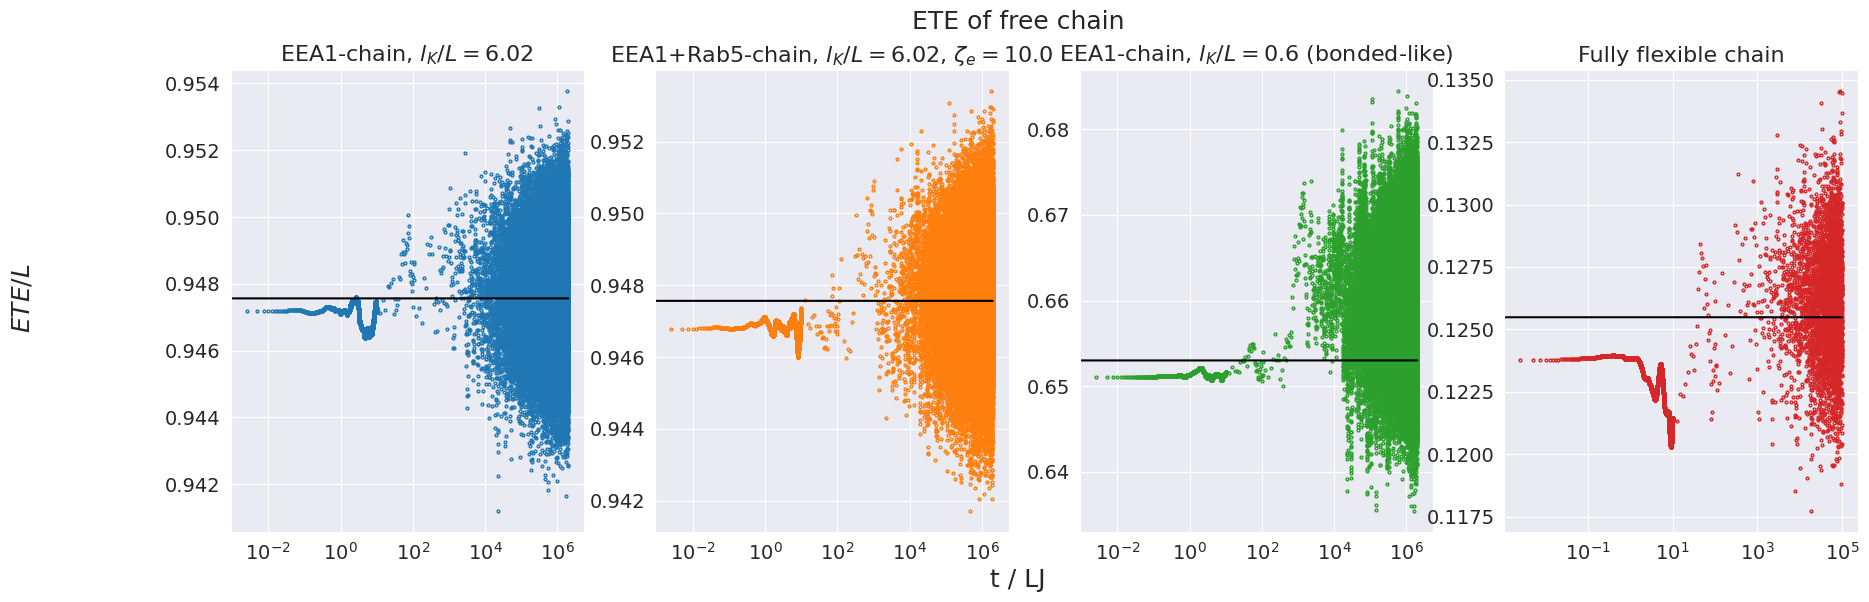

In [22]:
import matplotlib.patheffects as pe

fig, axs = plt.subplots(ncols=4, figsize=(21, 6))

for color, experiment, ax in zip(sns.color_palette(), experiments, axs):
    l_p = experiment["l_K"] * L_contour / 2
    R = 2 * l_p * L_contour - 2 * l_p ** 2 * (1 - np.exp(-L_contour / l_p))

    df = experiment["df_ete_mean"].copy()
    df.index = df.index * 0.0025
    df.index = df.index - df.index.min()

    print(R)

    marker_kwargs = {}
    marker_kwargs["linestyle"] = 'None'
    marker_kwargs["markersize"] = 2
    marker_kwargs["markerfacecolor"] = 'none'
    marker_kwargs["markeredgecolor"] = color
    marker_kwargs["fillstyle"] = 'none'
    marker_kwargs["marker"] = "o"
    ax.plot(df.index, np.sqrt(df) / L_contour, color=color, **marker_kwargs)

    ax.set(title=experiment["label"], xscale="log")

    ax.plot(
        df.index,
        np.repeat(np.sqrt(R) / L_contour, len(df)),
        color="black",
        label="ETE of worm like chain with corresponding $l_K$"
    )

fig.suptitle("ETE of free chain")
fig.supxlabel("t / LJ")
fig.supylabel("$ETE/L$")

In [23]:
def get_rouse_msdlm_df(ts):
    tau_R = 1 / (3 * np.pi ** 2) * N ** 2 * b ** 2 * zeta
    R = N * b ** 2
    msdlm = rouse.rouse_msdlm(ts, R_sq=R, tau_R=tau_R, N=N)
    df_theor = pd.DataFrame({
        "t/LJ": ts,
        "dr_N^2": msdlm
    })
    return df_theor


df_rouse_msdlm = get_rouse_msdlm_df(experiments[0]["df_msdlm"]["t/LJ"])
df_rouse_msdlm

,t/LJ,dr_N^2
401,1.0025,1.753697
402,1.0050,1.756181
403,1.0075,1.758662
404,1.0100,1.761141
405,1.0125,1.763616
...,...,...
17545657,109323.6175,10431.339808
17545658,109323.6200,10431.340046
17545659,109323.6225,10431.340284
17545660,109323.6250,10431.340522


Plotting 17 ...
Plotting 18 ...
Plotting 19 ...
Plotting 20 ...
Plotting 17 ...
Plotting 18 ...
Plotting 19 ...
Plotting 20 ...


/tmp/ipykernel_243413/1766625937.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


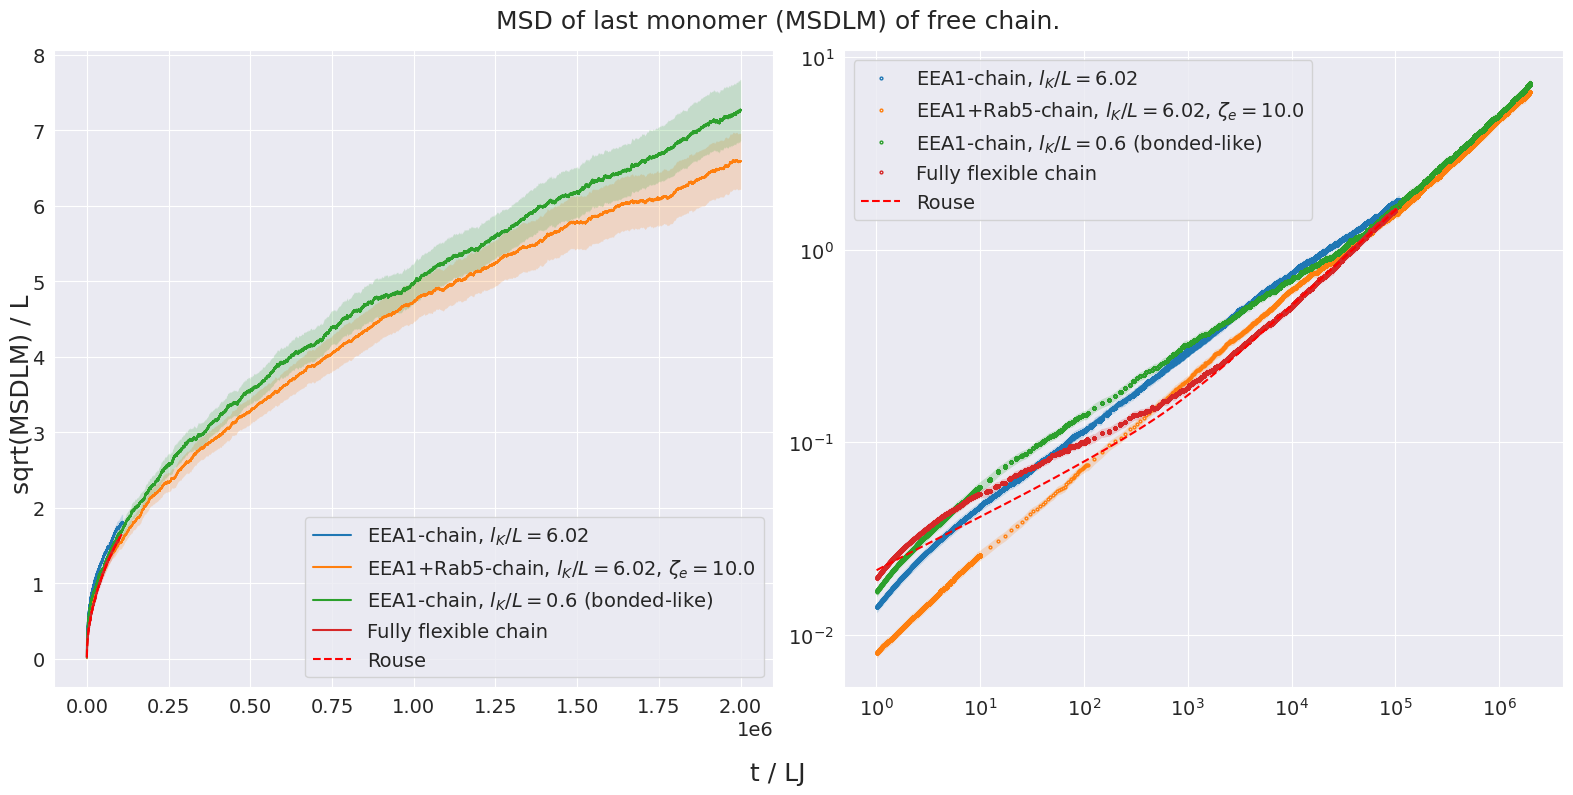

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

for ax, log in zip(axs, [False, True]):

    for experiment, color in zip(experiments, sns.color_palette()):
        
        print(f"Plotting {experiment['n']} ...")
        
        msd_plot.plot_MSD(
            experiment["df_msdlm"],
            log_scale=log,
            l_K=experiment["l_K"],
            L_contour=L_contour,
            zeta=zeta,
            zeta_e=experiment["zeta_e"],
            col="dr_N^2",
            label=experiment["label"],
            ax=ax,
            title="",
            ylabel="",
            xlabel="",
            scatter=log,
            marker_size=2,
            color=color
        )

    ax.plot(df_rouse_msdlm["t/LJ"], np.sqrt(df_rouse_msdlm["dr_N^2"]) / L_contour, label="Rouse", linestyle="--", color="red")

    ax.legend()

fig.suptitle("MSD of last monomer (MSDLM) of free chain.")
fig.supylabel("sqrt(MSDLM) / L")
fig.supxlabel("t / LJ")
fig.tight_layout()

In [25]:
def get_bins(df_msdlm: pd.DataFrame, th: float):
    i_max = len(df_msdlm["t/LJ"].index)
    bins = []
    
    for i in df_msdlm.index[1:]:
        t = df_msdlm["t/LJ"].iloc[i]
    
        j = i
        ts_bin = [t]
        while True:
            j += 1
            if j >= i_max:
                break
            t_j = df_msdlm["t/LJ"].iloc[j]
            if np.abs(np.log10(t_j/t)) < th:
                ts_bin.append(t_j)
            else:
                break
    
        j = i
        while True:
            j -= 1
            if j <= 0:
                break
            t_j = df_msdlm["t/LJ"].iloc[j]
            if np.abs(np.log10(t_j/t)) < th:
                ts_bin.append(t_j)
            else:
                break
        
        ts_bin = sorted(ts_bin)
        
        bins.append((ts_bin[0], ts_bin[-1]))

    return bins




In [26]:
n_bins = 12

for experiment in experiments:
    experiment["alpha"] = transform_msdlm.calculate_msd_alpha_df(experiment["df_msdlm"], n_bins=n_bins)

alpha_rouse = transform_msdlm.calculate_msd_alpha_df(df_rouse_msdlm, n_bins)

experiments[0]["alpha"]

KeyboardInterrupt: 

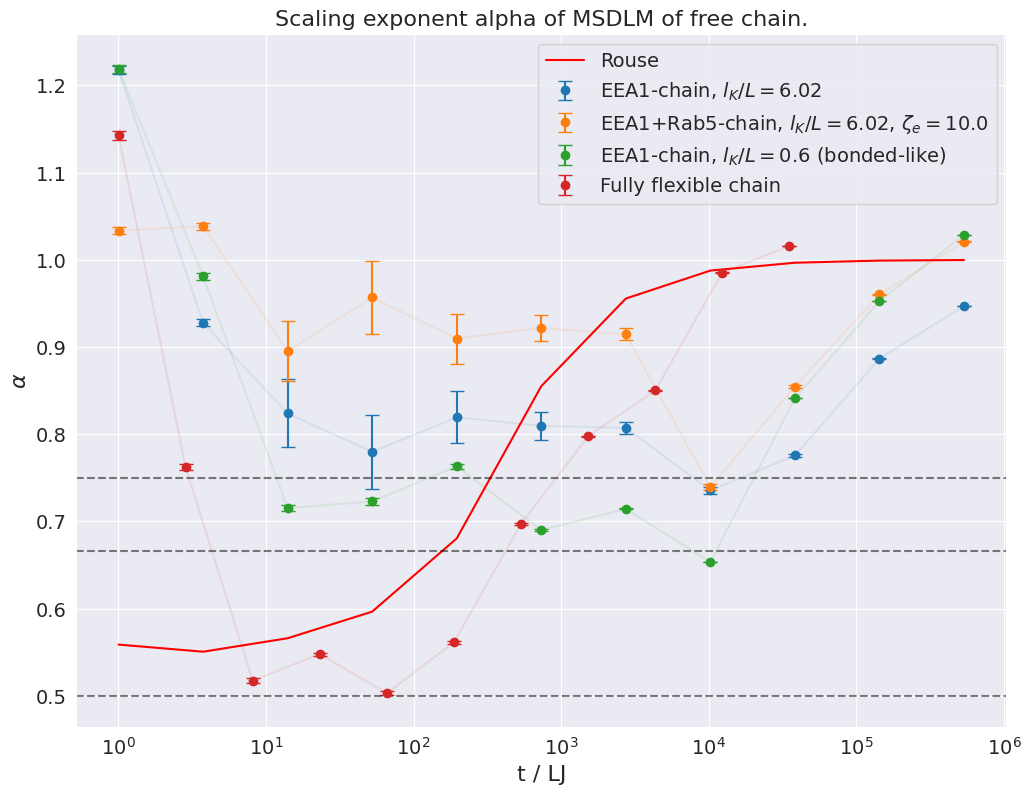

In [19]:
from scipy.signal import savgol_filter

ax: plt.Axes
fig, ax = plt.subplots()

for color, experiment in zip(sns.color_palette(), experiments):
    ax.errorbar(
        experiment["alpha"].index, 
        y=experiment["alpha"]["alpha"], 
        yerr=experiment["alpha"]["delta alpha"], 
        label=experiment["label"], 
        color=color,
        marker = "o",
        linestyle="none",
        capsize=5
    )
    ax.plot(experiment["alpha"].index, experiment["alpha"]["alpha"], color=color, alpha=0.1)

ax.plot(alpha_rouse.index, alpha_rouse["alpha"], linestyle="-", label="Rouse", color="red")

ax.axhline(y=2 / 3, color="black", linestyle="--", alpha=0.5)
ax.axhline(y=3 / 4, color="black", linestyle="--", alpha=0.5)
ax.axhline(y=1 / 2, color="black", linestyle="--", alpha=0.5)

ax.set(xscale="log", xlabel="t / LJ", ylabel="$\\alpha$", title="Scaling exponent alpha of MSDLM of free chain.")
ax.legend()